In [1]:
import numpy as np
from numpy import sin, cos, deg2rad
import matplotlib.pyplot as plt
from os.path import join, dirname, basename
from path import Path
import rephi

In [2]:
import holoviews as hv
hv.notebook_extension()

In [3]:
%matplotlib inline

In [7]:
NUMPAT = "[-+]?\d*\.\d+|\d+"
# PAT = re.compile("Bphi=({})_Ku=({})".format(NUMPAT, NUMPAT))
# PAT = re.compile("frac=({})".format(NUMPAT))
# PAT = re.compile("demag=(True|False)")
PAT = re.compile("Ku=({})".format(NUMPAT))
# PAT2 = re.compile("pinmult=({})".format(NUMPAT))
# PAT = re.compile("gc=({})".format(NUMPAT))
PAT2 = re.compile("phi=({})".format(NUMPAT))
FS = 16

In [8]:
def rhat(theta, phi):
    return np.array((sin(theta) * cos(phi), sin(theta) * sin(phi), cos(theta)))

def add_hyst_plot(ax, fname, cols, theta, phi, label=None):
    mx, my, mz, bx, by, bz = np.loadtxt(fname, unpack=True, usecols=cols)
    m = np.array((mx, my, mz)).transpose()
    b = np.array((bx, by, bz)).transpose()
    x = b.dot(rhat(theta, phi))
    y = m.dot(rhat(theta, phi))
    ax.plot(x, y, label=label, lw=3)
    
def hyst_plot_data(fname, cols, theta, phi):
    mx, my, mz, bx, by, bz = np.loadtxt(fname, unpack=True, usecols=cols)
    m = np.array((mx, my, mz)).transpose()
    b = np.array((bx, by, bz)).transpose()
    x = b.dot(rhat(theta, phi))
    y = m.dot(rhat(theta, phi))
    return x, y
    
def add_hyst_plot_unwrapped(ax, fname, cols, theta, phi):
    table_dirname = basename(dirname(fname))
    mx, my, mz, bx, by, bz = np.loadtxt(fname, unpack=True, usecols=cols)
    m = np.array((mx, my, mz)).transpose()
    b = np.array((bx, by, bz)).transpose()
    x = b.dot(rhat(theta, phi))
    y = m.dot(rhat(theta, phi))
    ax.plot(y, 'ko-')
    ax2 = ax.twinx()
    ax2.plot(x, 'ro-')
    
def kf(x):
    return float(re.search(PAT, x).groups()[0])

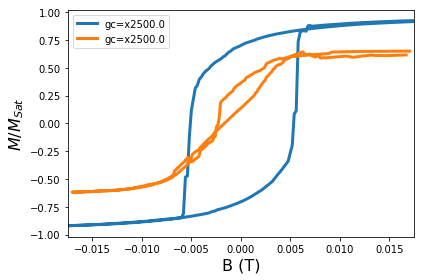

In [17]:
# Data parameters
study_dirname = Path(r"G:\box\jjirwin\Box Sync\mumax3_output\julian_irwin\save\Ni_pmn-pt_simulations_171214\17_vary_Ku_pinmult=200_10sites")
sim_dirnames = study_dirname.dirs(pattern='*Ku=2500*phi=*')
table_basename = 'table.txt'
fnames = [join(study_dirname, x, table_basename) for x in sim_dirnames]
fnames = sorted(fnames, key=kf)
mcols = [1, 2, 3]
mcols = [7, 8, 9]
bcols = [4, 5, 6]
cols = mcols + bcols

# Plot parameters
xlabel = 'B (T)'
ylabel = '$M/M_{Sat}$'
ylim = 1.1
xlim = None

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel(xlabel, size=FS)
ax.set_ylabel(ylabel, size=FS)
for fname in fnames:
#     phi, Ku = [float(x) for x in re.search(PAT, fname).groups()]
#     label = "$\phi={}$ $K_U={}$".format(phi, Ku)0
    frac = re.search(PAT, fname).groups()[0]
    mult = re.search(PAT2, fname).groups()[0]
    label = 'gc=x{}'.format(frac, mult)
    add_hyst_plot(ax, fname, cols, np.pi/2, np.pi/4, label=label)
plt.legend(loc=0)
plt.tight_layout()
xlim = 0.0175
plt.xlim(-xlim, xlim)
# plt.savefig(join(table_dirname, 'hyst.png'))
plt.show()

:NdLayout   [Default]
   :Curve   [x]   (y)
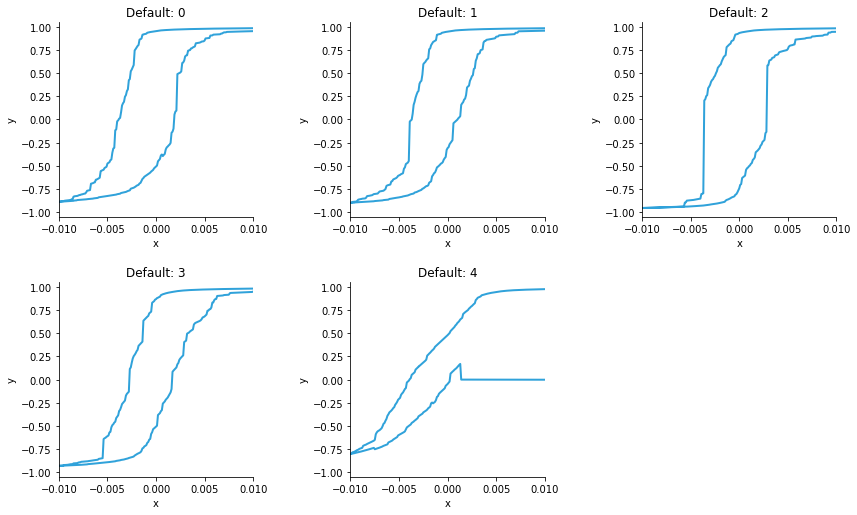

In [389]:
data = []

for fname in sorted(fnames, key=kf):
#     phi, Ku = [float(x) for x in re.search(PAT, fname).groups()]
    data.append(hyst_plot_data(fname, cols, np.pi/2, np.pi/2))
m = hv.HoloMap({i: hv.Curve(d, extents=(-0.01, -1.05, 0.01, 1.05)) for i, d in enumerate(data)})
hv.NdLayout(m).cols(3)

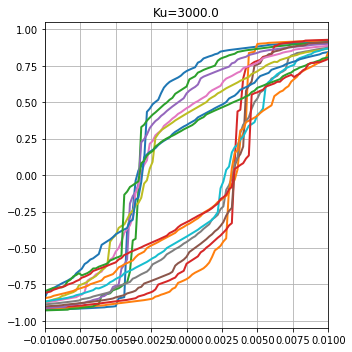

In [85]:
%matplotlib inline

data = []

for fname in sorted(fnames, key=kf):
#     phi, Ku = [float(x) for x in re.search(PAT, fname).groups()]
    data.append(hyst_plot_data(fname, cols, np.pi/2, np.pi/2))

ncols = 3
nrows = int(np.ceil(len(data)/3))
# fig, axarr = plt.subplots(ncols=ncols, nrows=nrows, figsize=(4 * ncols, 4 * nrows), )
fig, ax = plt.subplots(figsize=(5, 5))

# for (x, y), ax in zip(data, axarr.reshape(ncols*nrows)):
for (x, y) in data:
    #     phi, Ku = [float(x) for x in re.search(PAT, fname).groups()]
    #     label = "$\phi={}$ $K_U={}$".format(phi, Ku)
    frac = re.search(PAT, fname).groups()[0]
    #     mult = re.search(PAT2, fname).groups()[0]
    label = 'Ku={}'.format(frac, mult)
    N = len(x)
    x, y = x[:N//2], y[:N//2]
    ax.plot(x, y, lw=2)
    ax.plot(-x, -y, lw=2)
    ax.set_title(label)
    ax.grid(True)
    ax.set_xlim(-0.01, 0.01)
plt.tight_layout()
plt.show()
    

# Average two idential sims with different seeds

In [74]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F804AC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000ED14438>]], dtype=object)

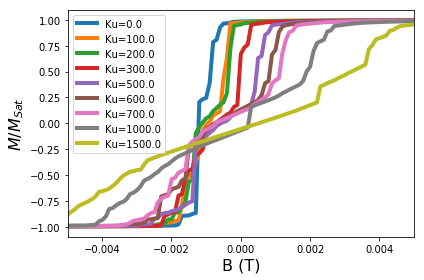

In [367]:
# Data parameters
studies = Path(r"G:\box\jjirwin\Box Sync\mumax3_output\julian_irwin\save")
study1 = studies.joinpath(r"Ni_pmn-pt_simulations_171214\13_vary_Ku_seed=283634")
study0 = studies.joinpath(r"Ni_pmn-pt_simulations_171214\12_vary_Ku_more_B_points")
sim_dirnames = [sorted(d.dirs(pattern='*Ku=*'), key=kf) for d in (study0, study1)]
table_basename = 'table.txt'
fnames = [[join(study_dirname, x, table_basename) for x in sd] for sd in sim_dirnames]
mcols = [1, 2, 3]
mcols_center = [7, 8, 9]
bcols = [4, 5, 6]
cols = mcols_center + bcols

# Plot parameters
xlabel = 'B (T)'
ylabel = '$M/M_{Sat}$'
ylim = 1.1
xlim = None

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel(xlabel, size=FS)
ax.set_ylabel(ylabel, size=FS)

xs, ys = [], []

for f0, f1 in zip(fnames[0], fnames[1]):
    x0, y0 = hyst_plot_data(f0, cols, np.pi/2, np.pi/2)
    x1, y1 = hyst_plot_data(f1, cols, np.pi/2, np.pi/2)
    y = (y0 + y1)/2.0
    xs.append(x0)
    ys.append(y)
#     phi, Ku = [float(x) for x in re.search(PAT, fname).groups()]
#     label = "$\phi={}$ $K_U={}$".format(phi, Ku)
    frac = re.search(PAT, f0).groups()[0]
    label = 'Ku={}'.format(frac)
    N = len(x0)
    x0, y = x0[:N//2], y[:N//2]
    ax.plot(x0, y, lw=4, label=label)
plt.legend(loc=0)
plt.tight_layout()
plt.xlim(-0.005, 0.005)
# plt.savefig(join(table_dirname, 'hyst.png'))
plt.show()

:NdLayout   [Default]
   :Curve   [x]   (y)
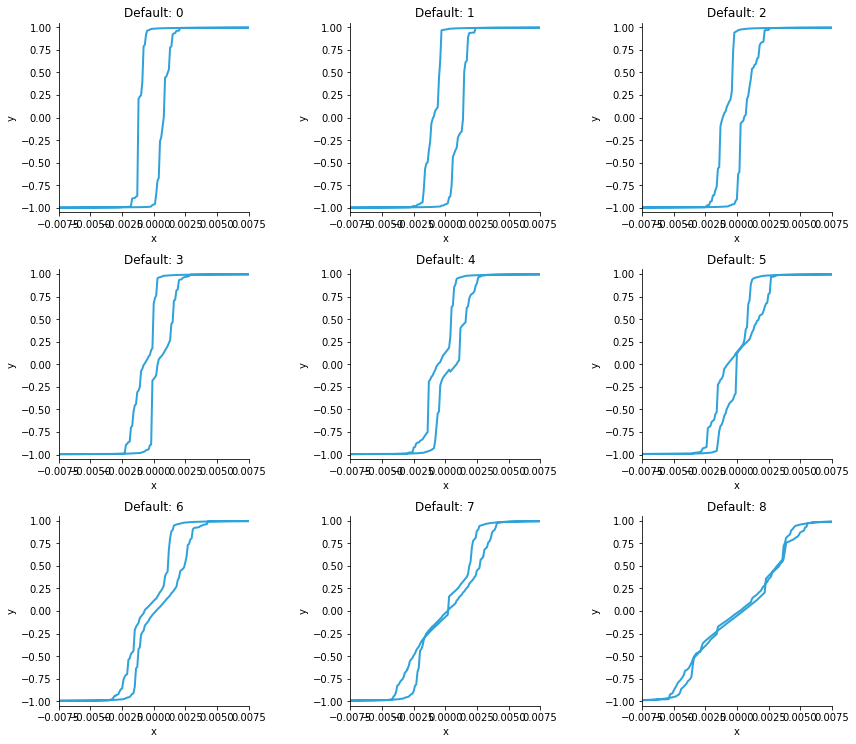

In [358]:
m = hv.HoloMap({i: hv.Curve(d, extents=(-0.0075, -1.05, 0.0075, 1.05)) for i, d in enumerate(zip(xs, ys))})
hv.NdLayout(m).cols(3)